## Question 1
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table4.png)

In [3]:
# your answer here
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Create the contingency table

observed = np.array([
    [32, 12],  # Low activity: Yes drinks, No drinks
    [14, 22],  # Medium activity: Yes drinks, No drinks
    [6, 9]     # High activity: Yes drinks, No drinks
])

In [15]:
# Create a pandas DataFrame for better visualization
activity_levels = ['Low', 'Medium', 'High']
drink_consumption = ['Yes', 'No']
df = pd.DataFrame(observed, index=activity_levels, columns=drink_consumption)
df['Total'] = df.sum(axis=1)
df.loc['Total'] = df.sum(axis=0)

print("Contingency Table:")
print(df)
print("\n")

Contingency Table:
        Yes  No  Total
Low      32  12     44
Medium   14  22     36
High      6   9     15
Total    52  43     95




In [18]:
# Calculate the chi-square statistic, p-value, degrees of freedom, and expected frequencies
chi2, p, dof, expected = stats.chi2_contingency(observed)
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-square statistic: 10.712198008709638
p-value: 0.004719280137040844
Degrees of freedom: 2


In [7]:
# Create a DataFrame for expected frequencies
expected_df = pd.DataFrame(expected, index=activity_levels, columns=drink_consumption)
print("Expected Frequencies:")
print(expected_df)
print("\n")

Expected Frequencies:
              Yes         No
Low     24.084211  19.915789
Medium  19.705263  16.294737
High     8.210526   6.789474




In [8]:
# Calculate the chi-square contribution of each cell
contribution = (observed - expected)**2 / expected
contribution_df = pd.DataFrame(contribution, index=activity_levels, columns=drink_consumption)
print("Chi-Square Contribution by Cell:")
print(contribution_df)
print("\n")

Chi-Square Contribution by Cell:
             Yes        No
Low     2.601693  3.146233
Medium  1.651844  1.997579
High    0.595142  0.719706




In [9]:
# Calculate the row percentages
row_percentages = df.iloc[:-1, :2].div(df.iloc[:-1, 2], axis=0) * 100
row_percentages_df = pd.DataFrame(row_percentages, index=activity_levels, columns=drink_consumption)
print("Row Percentages (% within each activity level):")
print(row_percentages_df)
print("\n")

Row Percentages (% within each activity level):
              Yes         No
Low     72.727273  27.272727
Medium  38.888889  61.111111
High    40.000000  60.000000




In [10]:
# Print the results
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Critical Value at 5% significance level: 5.991")

Chi-Square Statistic: 10.7122
P-value: 0.0047
Degrees of Freedom: 2
Critical Value at 5% significance level: 5.991


In [11]:
# Make a decision based on the p-value
alpha = 0.05
if p < alpha:
    decision = "Reject"
else:
    decision = "Fail to reject"

print(f"Decision: {decision} the null hypothesis")
print(f"Conclusion: There {'is' if p < alpha else 'is not'} a significant association between physical activity levels and sugary drink consumption at a 5% significance level.")


Decision: Reject the null hypothesis
Conclusion: There is a significant association between physical activity levels and sugary drink consumption at a 5% significance level.


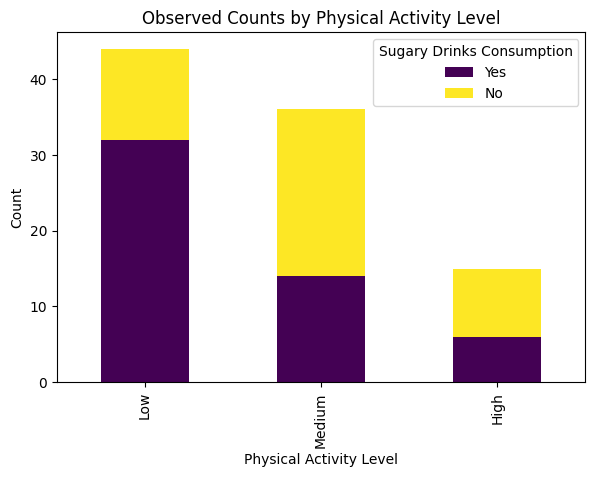

In [19]:
# Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Stacked bar chart of counts
plt.subplot(2, 2, 1)
df.iloc[:-1, :2].plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Observed Counts by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.legend(title='Sugary Drinks Consumption')

## [OPTIONAL] Question 2
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

Check [here](https://www.geeksforgeeks.org/how-to-create-a-poisson-probability-mass-function-plot-in-python/) how to create a poisson distribution and how to calculate the expected observations, using the probability mass function (pmf). 
A Poisson distribution is a discrete probability distribution. It gives the probability of an event happening a certain number of times (k) within a given interval of time or space. The Poisson distribution has only one parameter, λ (lambda), which is the mean number of events.

Observed mean: 2.4353
Observed variance: 2.1699
Poisson parameter (lambda): 2.435
Variance to mean ratio: 0.8910

Comparison of Expected vs Observed Counts:
Score	Observed	Expected	Difference
0	35	39.2	-4.2
1	99	95.6	3.4
2	104	116.3	-12.3
3	110	94.4	15.6
4	62	57.5	4.5
5	25	28.0	-3.0
6	10	11.4	-1.4
7	3	5.6	-2.6

Chi-square test statistic: 6.4913
Critical value (alpha=0.05, df=6): 12.5916
P-value: 0.4837
Conclusion: At a 0.05 significance level, fail to reject the null hypothesis.
There is insufficient evidence to suggest the data does not follow a Poisson distribution.


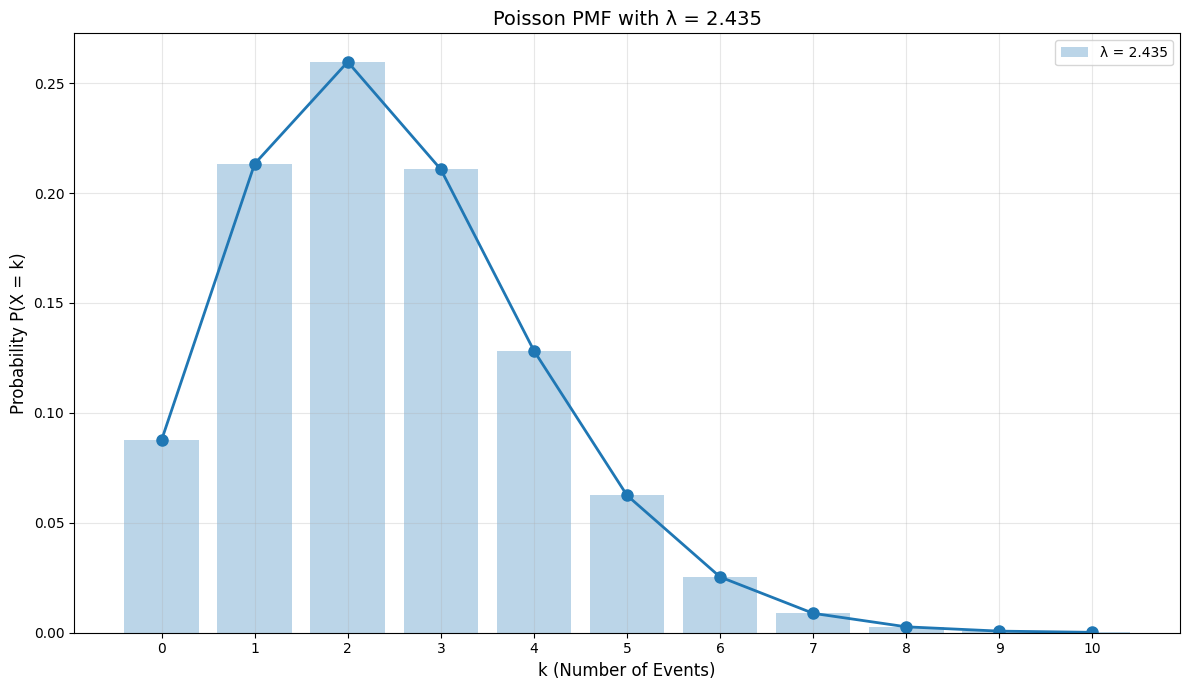

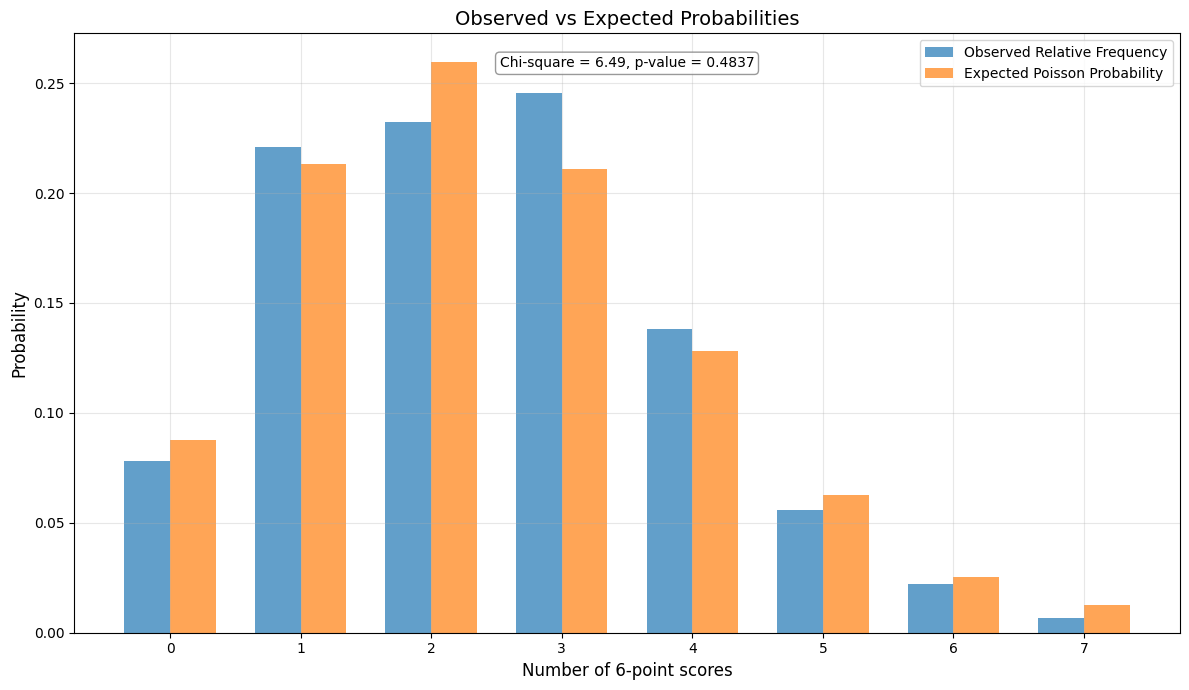

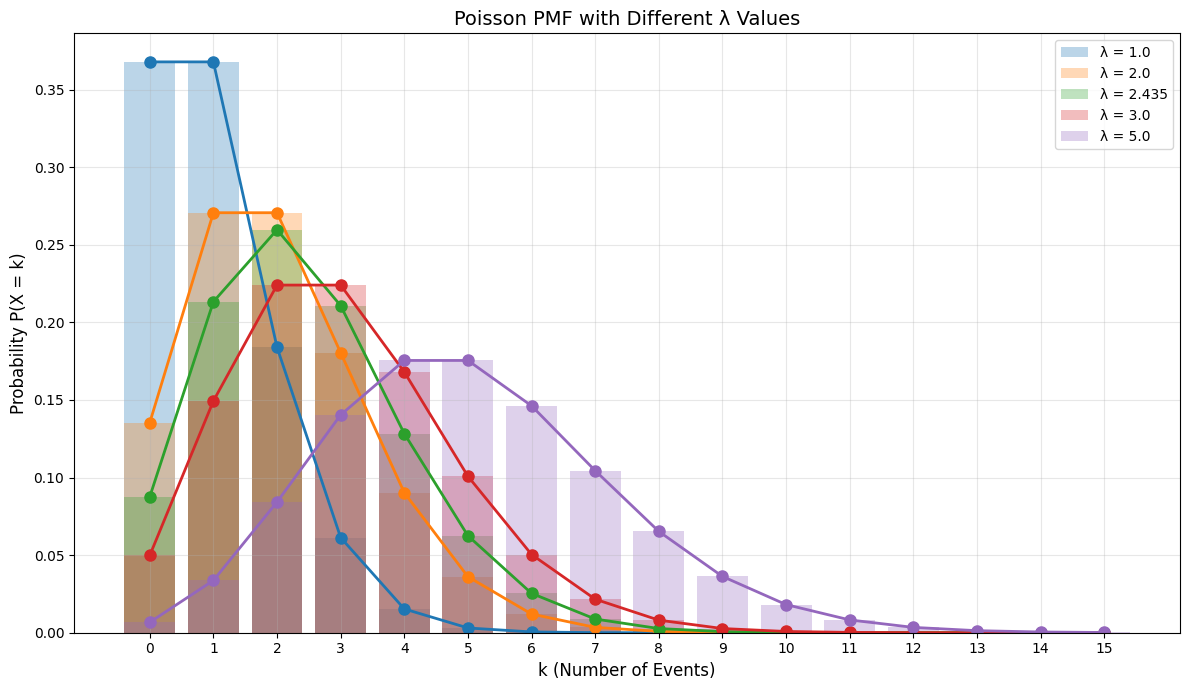

In [ ]:
#Answer: There is insufficient evidence to suggest the data does not follow a Poisson distribution.


import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Function to create a Poisson PMF plot
def plot_poisson_pmf(lambda_param, max_k=15, title="Poisson Probability Mass Function"):
    """
    Create a plot of the Poisson Probability Mass Function
    
    Parameters:
    -----------
    lambda_param : float or list of floats
        The Poisson parameter(s) lambda (average rate)
    max_k : int
        Maximum value of k to plot
    title : str
        Title for the plot
    """
    k_values = np.arange(0, max_k + 1)
    
    plt.figure(figsize=(12, 7))
    
    # If lambda_param is a single value, convert to list for consistency
    if not isinstance(lambda_param, list):
        lambda_param = [lambda_param]
    
    # Plot PMF for each lambda value
    for lam in lambda_param:
        # Calculate Poisson PMF values
        pmf_values = stats.poisson.pmf(k_values, lam)
        
        # Plot the PMF as both bars and points with lines
        plt.bar(k_values, pmf_values, alpha=0.3, label=f'λ = {lam}')
        plt.plot(k_values, pmf_values, 'o-', linewidth=2, markersize=8)
    
    plt.xlabel('k (Number of Events)', fontsize=12)
    plt.ylabel('Probability P(X = k)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    plt.xticks(k_values)
    
    # Ensure y-axis starts at 0
    plt.ylim(bottom=0)
    
    plt.tight_layout()
    return plt

# Let's apply this to the rugby data
# Given data from the American rugby match in the 1979 season
scores = np.array([0, 1, 2, 3, 4, 5, 6, 7])  # The '7' represents "7 or more"
frequencies = np.array([35, 99, 104, 110, 62, 25, 10, 3])
total_matches = np.sum(frequencies)  # 448 matches

# Given Poisson parameter from the problem
lambda_param = 2.435

# Calculate observed probabilities (relative frequencies)
observed_probs = frequencies / total_matches

# Calculate expected Poisson probabilities
expected_probs = []
for k in range(7):  # Handle 0-6 separately
    poisson_prob = stats.poisson.pmf(k, lambda_param)
    expected_probs.append(poisson_prob)

# Handle the "7 or more" category
poisson_prob_7_plus = 1 - stats.poisson.cdf(6, lambda_param)
expected_probs.append(poisson_prob_7_plus)

# Plot the theoretical Poisson PMF with lambda = 2.435
plt_theoretical = plot_poisson_pmf(lambda_param, max_k=10, 
                                  title=f"Poisson PMF with λ = {lambda_param}")
plt_theoretical.savefig('poisson_theoretical.png')

# Create comparison plot between observed and expected probabilities
plt.figure(figsize=(12, 7))

# Bar width for grouped bars
bar_width = 0.35
index = np.arange(len(scores))

# Plot observed vs expected
plt.bar(index, observed_probs, bar_width, alpha=0.7, label='Observed Relative Frequency')
plt.bar(index + bar_width, expected_probs, bar_width, alpha=0.7, label='Expected Poisson Probability')

# Add labels and title
plt.xlabel('Number of 6-point scores', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Observed vs Expected Probabilities', fontsize=14)
plt.xticks(index + bar_width/2, scores)
plt.legend()
plt.grid(True, alpha=0.3)

# Calculate goodness-of-fit
chi2_stat, p_value = stats.chisquare(frequencies, np.array(expected_probs) * total_matches)
plt.annotate(f"Chi-square = {chi2_stat:.2f}, p-value = {p_value:.4f}", 
             xy=(0.5, 0.95), xycoords='axes fraction', 
             ha='center', va='center', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.savefig('poisson_rugby_comparison.png')

# Create a visual for multiple lambda values for comparison
different_lambdas = [1.0, 2.0, 2.435, 3.0, 5.0]
plt_multiple = plot_poisson_pmf(different_lambdas, max_k=15, 
                               title="Poisson PMF with Different λ Values")
plt_multiple.savefig('poisson_multiple_lambdas.png')

# Calculate the variance of the observed data
observed_mean = np.sum(scores * frequencies) / total_matches
observed_variance = np.sum(((scores - observed_mean)**2) * frequencies) / total_matches

print(f"Observed mean: {observed_mean:.4f}")
print(f"Observed variance: {observed_variance:.4f}")
print(f"Poisson parameter (lambda): {lambda_param}")
print(f"Variance to mean ratio: {observed_variance/observed_mean:.4f}")

# Compare expected vs observed counts
print("\nComparison of Expected vs Observed Counts:")
print("Score\tObserved\tExpected\tDifference")
expected_counts = np.array(expected_probs) * total_matches
for i in range(len(scores)):
    print(f"{scores[i]}\t{frequencies[i]}\t{expected_counts[i]:.1f}\t{frequencies[i] - expected_counts[i]:.1f}")

# Chi-square goodness of fit test
# Degrees of freedom = number of categories - 1 - number of estimated parameters
df = len(scores) - 1 - 1  # subtract 1 for estimated lambda
critical_value = stats.chi2.ppf(0.95, df)

print(f"\nChi-square test statistic: {chi2_stat:.4f}")
print(f"Critical value (alpha=0.05, df={df}): {critical_value:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: At a 0.05 significance level, reject the null hypothesis.")
    print("There is evidence to suggest the data does not follow a Poisson distribution.")
else:
    print("Conclusion: At a 0.05 significance level, fail to reject the null hypothesis.")
    print("There is insufficient evidence to suggest the data does not follow a Poisson distribution.")